<h1> Social Network Analytics Assignment 2 </h1>
<h2> Team Number:10 </h2>
<h2> Novel used : Oliver Twist by Charles Dickenson </h2>
<h2> Team Members: </h2>
<h3>
Srinivas Shekar - 01FB15ECS308 <br />
Mukund Sood     - 01FB15ECS363 <br />
Vaishnavi Rao   - 01FB15ECS334 <br />
</h3>

<h2> CODE </h2>

In [1]:
# Importing Libraries

import networkx as nx
import matplotlib.pyplot as  plt
from operator import itemgetter
import pandas as pd
import numpy as np
import seaborn as sns

import csv
import nltk
import spacy
from nltk.tokenize import word_tokenize
import string

import scipy
from scipy.stats.stats import pearsonr

import collections

import community

from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import k_clique_communities

In [2]:
def load_book(book_path, lower=False):
    with open(book_path) as f:
        book = f.read()
    if lower:
        book = book.lower()
    return book

In [3]:
def remove_punctuation(input_string):
    return input_string.translate(str.maketrans('', '', string.punctuation+'’'))

In [4]:
def extract_names(book):
    nlp = spacy.load('en')
    stopwords = nltk.corpus.stopwords.words('english')
        
    words = [remove_punctuation(w) for w in book.split()]
    unique_words = list(set(words))

    characters = [word.text for word in nlp(' '.join(unique_words)) if word.pos_ == 'PROPN']
    characters = [c for c in characters if len(c) > 2]
    characters = [c for c in characters if c.istitle()]
    characters = [c for c in characters if not (c[-1] == 's' and c[:-1] in characters)]
    characters = list(set([c.title() for c in [c.lower() for c in characters]]) - set(stopwords))

    return [tuple([c + ' ']) for c in set(characters)]

In [5]:
def get_sequences(book):
    detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = detector.tokenize(book)
    return sentences

In [6]:
def get_word_sequences(book, n=50):
    book_words = word_tokenize(book)
    return [' '.join(book_words[i: i+n]) for i in range(0, len(book_words), n)]

In [7]:
def get_character_sequences(book, n=200):
    return [''.join(book[i: i+n]) for i in range(0, len(book), n)]

In [8]:
def get_interaction_df(cooccurence, threshold=0):
    rows, columns = np.where(np.triu(cooccurence.values, 1) > threshold)

    return pd.DataFrame(np.column_stack([cooccurence.index[rows],
                                         cooccurence.columns[columns],
                                         cooccurence.values[rows, columns]]),
                        columns=['source', 'target', 'value'])


In [9]:
def calculate_cooccurence(df):
    characters = df.columns.values
    cooccurence = df.values.T.dot(df.values)
    np.fill_diagonal(cooccurence, 0)
    cooccurence = pd.DataFrame(cooccurence, columns=characters, index=characters)
    return cooccurence

In [10]:
def find_connections(sequences, characters):
    if any(len(names) > 1 for names in characters):
        df = pd.DataFrame({str(character):
                           {sequence: sum([sequence.count(name) for name in character])
                            for sequence in sequences}
                           for character in characters})
    else:
        characters = [c[0] for c in characters]
        df = pd.DataFrame([[sequence.count(character)
                            for character in characters]
                           for sequence in sequences],
                          index=sequences,
                          columns=characters)
    return df

In [11]:
threshold=2 # allowing min of two connections
book = load_book('oliver_twist.txt')

sequences = get_sequences(book)
characters = extract_names(book)

df = find_connections(sequences, characters)
cooccurence = calculate_cooccurence(df)
interaction_df=get_interaction_df(cooccurence, threshold)


G=nx.convert_matrix.from_pandas_edgelist(interaction_df,source='source',target='target')
nx.write_gml(G,"graph1.gml")
nx.write_gexf(G, "test1.gexf")

In [12]:
# Creating the graph using the given gml file

G = nx.read_gml('graph1.gml')

### Visualization of the entire graph with networkx layouts

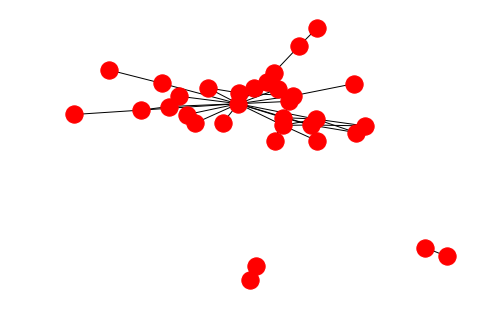

In [13]:
nx.draw(G)

# Uncomment to view the graph with labeled nodes
# nx.draw_networkx(G)

<h3> Visualization of the largest component in the graph with networkx layouts </h3>

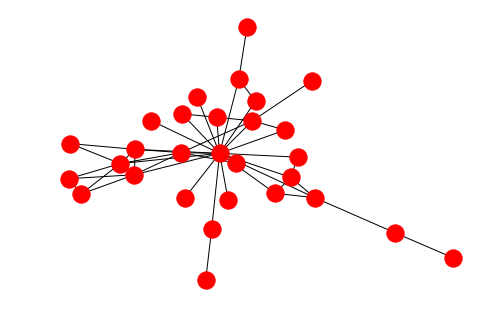

In [14]:
graphs = list(nx.connected_component_subgraphs(G))

# Drawing the largest component separately
largest_comp=0

for graph in graphs:
    if(len(graph.nodes())>largest_comp):
        largest_comp=len(graph.nodes())
        G=graph
nx.draw(G)

### Visualisation with Gephi

 Information about the graph 
Name: 
Type: Graph
Number of nodes: 33
Number of edges: 49
Average degree:   2.9697


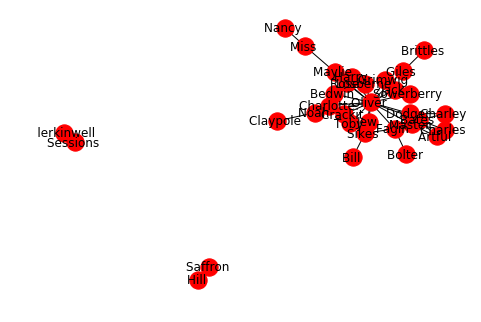

In [15]:
G1=nx.read_gexf("test1.gexf")
print(' Information about the graph ')
print(nx.info(G1))
nx.draw_spring(G1,with_labels=True)

<h3> a. What are the number of nodes and edges? </h3>

In [16]:
edge_attributes = list(G.edges(data=True))
nodes = list(G.nodes())

print("Number of nodes:", len(nodes))
print("Nodes are as follows:")
for node in nodes:
    print("Node:", node)

print("\n\n\nNumber of Edges:", len(edge_attributes))
print("Edge Attributes are as follows:")
for attribute in edge_attributes:
    print("Node:", attribute[0], "Node:", attribute[1])
    

Number of nodes: 29
Nodes are as follows:
Node: Toby 
Node: Harry 
Node: Master 
Node: Giles 
Node: Sikes 
Node: Charley 
Node: Charlotte 
Node: Brittles 
Node: Bolter 
Node: Maylie 
Node: Oliver 
Node: Jack 
Node: Noah 
Node: Fagin 
Node: Nancy 
Node: Crackit 
Node: Sowerberry 
Node: Claypole 
Node: Bedwin 
Node: Dodger 
Node: Jew 
Node: Rose 
Node: Artful 
Node: Grimwig 
Node: Losberne 
Node: Miss 
Node: Bill 
Node: Charles 
Node: Bates 



Number of Edges: 47
Edge Attributes are as follows:
Node: Toby  Node: Oliver 
Node: Toby  Node: Sikes 
Node: Toby  Node: Crackit 
Node: Harry  Node: Rose 
Node: Harry  Node: Maylie 
Node: Harry  Node: Oliver 
Node: Master  Node: Oliver 
Node: Master  Node: Charles 
Node: Master  Node: Fagin 
Node: Master  Node: Dodger 
Node: Master  Node: Artful 
Node: Master  Node: Bates 
Node: Giles  Node: Oliver 
Node: Giles  Node: Brittles 
Node: Sikes  Node: Oliver 
Node: Sikes  Node: Fagin 
Node: Sikes  Node: Bill 
Node: Sikes  Node: Jew 
Node: Charley  Node

<h3>b. Do a centrality analysis (degree, closeness, betweenness, eigenvector) of all the nodes</h3>

In [17]:
# Calculating Degree centrality for all nodes in the graph

deg_centrality = nx.degree_centrality(G)
sorted_deg_centrality = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)

print('Degree centrality: \n')

for key_value in sorted_deg_centrality:
    print(key_value[0], ":", key_value[1])

Degree centrality: 

Oliver  : 0.6785714285714285
Bates  : 0.25
Master  : 0.21428571428571427
Fagin  : 0.21428571428571427
Sikes  : 0.17857142857142855
Dodger  : 0.17857142857142855
Maylie  : 0.14285714285714285
Rose  : 0.14285714285714285
Toby  : 0.10714285714285714
Harry  : 0.10714285714285714
Noah  : 0.10714285714285714
Artful  : 0.10714285714285714
Charles  : 0.10714285714285714
Giles  : 0.07142857142857142
Charley  : 0.07142857142857142
Charlotte  : 0.07142857142857142
Crackit  : 0.07142857142857142
Jew  : 0.07142857142857142
Losberne  : 0.07142857142857142
Miss  : 0.07142857142857142
Brittles  : 0.03571428571428571
Bolter  : 0.03571428571428571
Jack  : 0.03571428571428571
Nancy  : 0.03571428571428571
Sowerberry  : 0.03571428571428571
Claypole  : 0.03571428571428571
Bedwin  : 0.03571428571428571
Grimwig  : 0.03571428571428571
Bill  : 0.03571428571428571


In [18]:
# Calculating Betweenness centrality for all nodes in the graph

bet_centrality = nx.betweenness_centrality(G)
sorted_bet_centrality = sorted(bet_centrality.items(), key=itemgetter(1), reverse=True)

print('Betweenness centrality: \n')

for key_value in sorted_bet_centrality:
    print(key_value[0], ":", key_value[1])

Betweenness centrality: 

Oliver  : 0.8293650793650793
Maylie  : 0.13756613756613756
Bates  : 0.10052910052910052
Fagin  : 0.0873015873015873
Sikes  : 0.07804232804232804
Giles  : 0.07142857142857142
Noah  : 0.07142857142857142
Miss  : 0.07142857142857142
Master  : 0.06349206349206349
Dodger  : 0.031746031746031744
Rose  : 0.005291005291005291
Toby  : 0.0026455026455026454
Harry  : 0.0
Charley  : 0.0
Charlotte  : 0.0
Brittles  : 0.0
Bolter  : 0.0
Jack  : 0.0
Nancy  : 0.0
Crackit  : 0.0
Sowerberry  : 0.0
Claypole  : 0.0
Bedwin  : 0.0
Jew  : 0.0
Artful  : 0.0
Grimwig  : 0.0
Losberne  : 0.0
Bill  : 0.0
Charles  : 0.0


In [19]:
# Calculating Closeness centrality for all nodes in the graph

close_centrality = nx.closeness_centrality(G)
sorted_close_centrality = sorted(close_centrality.items(), key=itemgetter(1), reverse=True)

print('Closeness centrality: \n')

for key_value in sorted_close_centrality:
    print(key_value[0], ":", key_value[1])

Closeness centrality: 

Oliver  : 0.7368421052631579
Fagin  : 0.509090909090909
Bates  : 0.509090909090909
Master  : 0.5
Dodger  : 0.49122807017543857
Sikes  : 0.4745762711864407
Maylie  : 0.4745762711864407
Rose  : 0.4666666666666667
Harry  : 0.45901639344262296
Toby  : 0.45161290322580644
Noah  : 0.45161290322580644
Giles  : 0.4444444444444444
Charlotte  : 0.4444444444444444
Jew  : 0.4444444444444444
Crackit  : 0.4375
Losberne  : 0.4375
Jack  : 0.4307692307692308
Sowerberry  : 0.4307692307692308
Bedwin  : 0.4307692307692308
Grimwig  : 0.4307692307692308
Artful  : 0.35
Charles  : 0.35
Charley  : 0.345679012345679
Bolter  : 0.34146341463414637
Miss  : 0.3333333333333333
Bill  : 0.32558139534883723
Claypole  : 0.3146067415730337
Brittles  : 0.3111111111111111
Nancy  : 0.25225225225225223


In [20]:
# Calculating Eigenvector centrality for all nodes in the graph

eigen_centrality = nx.eigenvector_centrality(G)
sorted_eigen_centrality = sorted(eigen_centrality.items(), key=itemgetter(1), reverse=True)

print('Eigenvector centrality: \n')

for key_value in sorted_eigen_centrality:
    print(key_value[0], ":", key_value[1])

Eigenvector centrality: 

Oliver  : 0.5582373610812387
Bates  : 0.3168247883062895
Master  : 0.3012532883252841
Fagin  : 0.3009523498415684
Dodger  : 0.2775471330156598
Sikes  : 0.20826663065480422
Rose  : 0.17658203933113575
Maylie  : 0.1617015729255237
Harry  : 0.15733045269519777
Toby  : 0.1565257038770477
Jew  : 0.1345133697061556
Artful  : 0.13154992569051452
Charles  : 0.13154992569051452
Losberne  : 0.1289532969019724
Crackit  : 0.1254334689456079
Noah  : 0.12271509104196215
Charlotte  : 0.11950005333634822
Charley  : 0.1043047620991048
Giles  : 0.10107763632127538
Jack  : 0.09796476206993075
Sowerberry  : 0.09796476206993075
Bedwin  : 0.09796476206993075
Grimwig  : 0.09796476206993075
Bolter  : 0.05281350710187445
Bill  : 0.03654860763622485
Miss  : 0.029278890130710184
Claypole  : 0.021535291266417476
Brittles  : 0.017738109483171442
Nancy  : 0.005138228197950908


In [21]:
# Looking at a comparison of the centralities for each character by creating a pandas dataframe

centrality_measures = {
'Degree': deg_centrality,
'Betweenness': bet_centrality,
'Closeness': close_centrality,
'Eigenvector':eigen_centrality,
}

centrality_comparison = pd.DataFrame(centrality_measures)

print(centrality_comparison)


             Betweenness  Closeness    Degree  Eigenvector
Artful          0.000000   0.350000  0.107143     0.131550
Bates           0.100529   0.509091  0.250000     0.316825
Bedwin          0.000000   0.430769  0.035714     0.097965
Bill            0.000000   0.325581  0.035714     0.036549
Bolter          0.000000   0.341463  0.035714     0.052814
Brittles        0.000000   0.311111  0.035714     0.017738
Charles         0.000000   0.350000  0.107143     0.131550
Charley         0.000000   0.345679  0.071429     0.104305
Charlotte       0.000000   0.444444  0.071429     0.119500
Claypole        0.000000   0.314607  0.035714     0.021535
Crackit         0.000000   0.437500  0.071429     0.125433
Dodger          0.031746   0.491228  0.178571     0.277547
Fagin           0.087302   0.509091  0.214286     0.300952
Giles           0.071429   0.444444  0.071429     0.101078
Grimwig         0.000000   0.430769  0.035714     0.097965
Harry           0.000000   0.459016  0.107143     0.1573

<h3> c. Calculate Pearson Correlation coefficient between each pair of centrality ( vectors) </h3>

In [22]:
# Using the values from the created dataframe to ensure the correct values are being compared
# ie - Anzelma's Degree Centrality value against Anzelma's Betweenness Centrality value

deg_data = centrality_comparison['Degree']
bet_data = centrality_comparison['Betweenness']
close_data = centrality_comparison['Closeness']
eigen_data = centrality_comparison['Eigenvector']

print("Pearson Correlation Coefficient between:")

deg_bet = pearsonr(deg_data,bet_data)
print("1. Degree and Betweenness Centrality:", deg_bet[0])

deg_close = pearsonr(deg_data,close_data)
print("2. Degree and Closeness Centrality:", deg_close[0])

deg_eigen = pearsonr(deg_data,eigen_data)
print("3. Degree and eigenvector:", deg_eigen[0])

bet_close = pearsonr(bet_data,close_data)
print("4. Betweennness and Closeness Centrality:", bet_close[0])

eigen_close = pearsonr(eigen_data,close_data)
print("5. Eigenvector and Closeness Centrality:", eigen_close[0])

bet_eigen = pearsonr(bet_data,eigen_data)
print("6. Betweennness and Eigenvector Centrality :", bet_eigen[0])


Pearson Correlation Coefficient between:
1. Degree and Betweenness Centrality: 0.9251097792938657
2. Degree and Closeness Centrality: 0.8256895257312625
3. Degree and eigenvector: 0.9318196365815473
4. Betweennness and Closeness Centrality: 0.7299615356122345
5. Eigenvector and Closeness Centrality: 0.909503863673318
6. Betweennness and Eigenvector Centrality : 0.7603277634432617


### d. Find the diameter of the graph

In [23]:
diameter = (nx.diameter(G))

print("Diameter of the graphs is:", diameter)


Diameter of the graphs is: 5


### e. Find the network density

In [24]:
density= (nx.density(G))

print("Calculated Network Density of the graphs is:", density)

Calculated Network Density of the graphs is: 0.11576354679802955


### f. For the top 5 nodes ( in terms of degree centrality), draw the ego network and list their alters

In [25]:
print ("Top 5 nodes with highest degree centrality: \n")

# Use this list to keep the names of all the important nodes
nodes = []

for item in sorted_deg_centrality[:5]:
    print("Degree Centrality for Node", item[0], "is", item[1])
    nodes.append(item[0])

Top 5 nodes with highest degree centrality: 

Degree Centrality for Node Oliver  is 0.6785714285714285
Degree Centrality for Node Bates  is 0.25
Degree Centrality for Node Master  is 0.21428571428571427
Degree Centrality for Node Fagin  is 0.21428571428571427
Degree Centrality for Node Sikes  is 0.17857142857142855


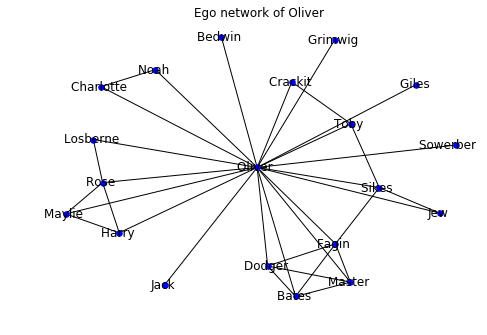

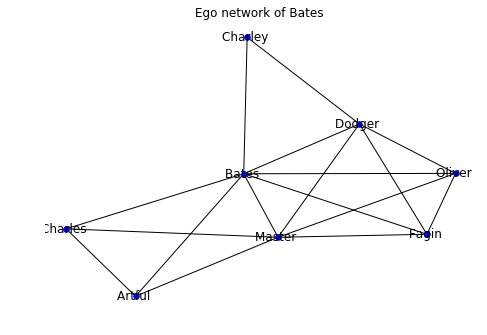

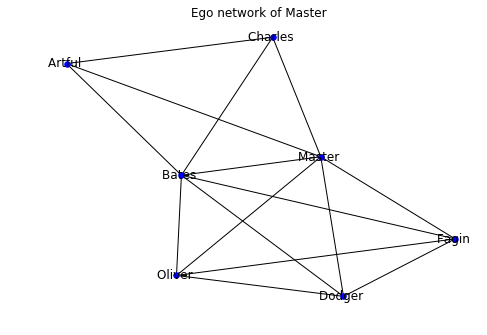

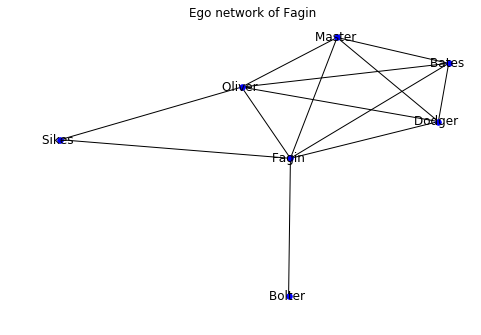

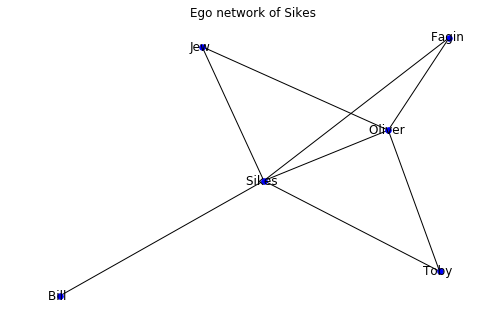

In [26]:
# Drawing the specific Ego Netwroks of the nodes with the top three degree centralities

for i in nodes:
    hub_ego=nx.ego_graph(G,i)
    pos=nx.spring_layout(hub_ego)
    nx.draw(hub_ego,pos,node_color='b',node_size=30,with_labels=True)
    plt.title("Ego network of "+i)
    plt.show()

<h3> g. Draw a degree distribution histogram and a log-log plot </h3>

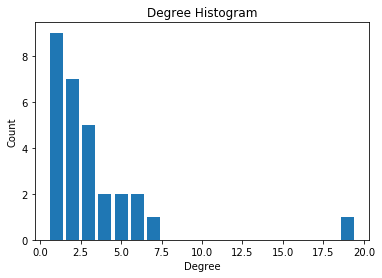

In [27]:
# Extracting the degrees of each node in the graph
degree_sequence = sorted([d for n,d in G.degree()], reverse=True) # degree sequence

# Getting a count of the number of occurences of each degree 
degreeCount = collections.Counter(degree_sequence)

# Plotting the histogram
plt.bar(degreeCount.keys(), degreeCount.values())
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

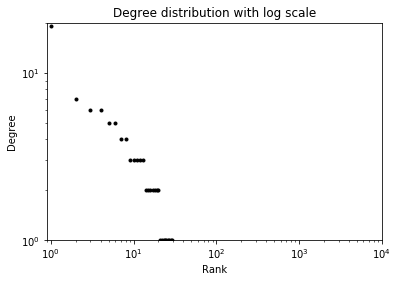

In [28]:
# Plotting the Log Degree Distribution

plt.loglog(range(1,G.order()+1),degree_sequence,'k.')

plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')

plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)

plt.show()

### h. Find the average path distance 

In [29]:
average_path_length = nx.average_shortest_path_length(G)

print("Average Path Length:", average_path_length)

Average Path Length: 2.4433497536945814


### i. Find the average clustering coefficient

In [30]:
print('\nGlobal clustering coefficient is:', nx.average_clustering(G))


Global clustering coefficient is: 0.4412842450954973


### o. Detect community using Louvain and Clique percolation methods

In [31]:
# Generating communities using the built-in algorithm

generated_communities = girvan_newman(G)

ctr = 1

for communiti in generated_communities:
    print("Community", ctr)
    for member in communiti: 
        print(member, end=";\n")
    print("\n")
    ctr += 1

Community 1
{'Toby ', 'Master ', 'Giles ', 'Sikes ', 'Charley ', 'Charlotte ', 'Brittles ', 'Bolter ', 'Oliver ', 'Jack ', 'Noah ', 'Fagin ', 'Crackit ', 'Sowerberry ', 'Claypole ', 'Bedwin ', 'Dodger ', 'Jew ', 'Artful ', 'Grimwig ', 'Bill ', 'Charles ', 'Bates '};
{'Rose ', 'Harry ', 'Losberne ', 'Miss ', 'Nancy ', 'Maylie '};


Community 2
{'Toby ', 'Master ', 'Sikes ', 'Charley ', 'Charlotte ', 'Bolter ', 'Oliver ', 'Jack ', 'Noah ', 'Fagin ', 'Crackit ', 'Sowerberry ', 'Claypole ', 'Bedwin ', 'Dodger ', 'Jew ', 'Artful ', 'Grimwig ', 'Bill ', 'Charles ', 'Bates '};
{'Rose ', 'Harry ', 'Losberne ', 'Miss ', 'Nancy ', 'Maylie '};
{'Giles ', 'Brittles '};


Community 3
{'Oliver ', 'Jack ', 'Jew ', 'Toby ', 'Charley ', 'Artful ', 'Bolter ', 'Grimwig ', 'Master ', 'Fagin ', 'Bill ', 'Crackit ', 'Charles ', 'Bedwin ', 'Sowerberry ', 'Bates ', 'Sikes ', 'Dodger '};
{'Rose ', 'Harry ', 'Losberne ', 'Miss ', 'Nancy ', 'Maylie '};
{'Giles ', 'Brittles '};
{'Noah ', 'Claypole ', 'Charlotte '

{'Toby '};
{'Harry '};
{'Master '};
{'Giles '};
{'Sikes '};
{'Charley '};
{'Charlotte '};
{'Brittles '};
{'Bolter '};
{'Maylie '};
{'Oliver '};
{'Jack '};
{'Noah ', 'Claypole '};
{'Fagin ', 'Bates ', 'Dodger '};
{'Nancy ', 'Miss '};
{'Crackit '};
{'Sowerberry '};
{'Bedwin '};
{'Jew '};
{'Rose '};
{'Artful '};
{'Grimwig '};
{'Losberne '};
{'Bill '};
{'Charles '};


Community 25
{'Toby '};
{'Harry '};
{'Master '};
{'Giles '};
{'Sikes '};
{'Charley '};
{'Charlotte '};
{'Brittles '};
{'Bolter '};
{'Maylie '};
{'Oliver '};
{'Jack '};
{'Noah '};
{'Fagin ', 'Bates ', 'Dodger '};
{'Nancy ', 'Miss '};
{'Crackit '};
{'Sowerberry '};
{'Claypole '};
{'Bedwin '};
{'Jew '};
{'Rose '};
{'Artful '};
{'Grimwig '};
{'Losberne '};
{'Bill '};
{'Charles '};


Community 26
{'Toby '};
{'Harry '};
{'Master '};
{'Giles '};
{'Sikes '};
{'Charley '};
{'Charlotte '};
{'Brittles '};
{'Bolter '};
{'Maylie '};
{'Oliver '};
{'Jack '};
{'Noah '};
{'Fagin '};
{'Nancy ', 'Miss '};
{'Crackit '};
{'Sowerberry '};
{'Claypo

In [32]:
# Community Detection using the function that implements the louvain method

# Computing the best partition
partition = community.best_partition(G)

ctr = 1

for com in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    
    print("Community", ctr)
    
    for node in list_nodes:
        print(node, end="; ")
    
    ctr += 1
    print("\n")

Community 1
Toby ; Sikes ; Oliver ; Jack ; Crackit ; Sowerberry ; Bedwin ; Jew ; Grimwig ; Bill ; 

Community 2
Harry ; Maylie ; Nancy ; Rose ; Losberne ; Miss ; 

Community 3
Master ; Charley ; Bolter ; Fagin ; Dodger ; Artful ; Charles ; Bates ; 

Community 4
Giles ; Brittles ; 

Community 5
Charlotte ; Noah ; Claypole ; 



[0, 1, 2, 3, 4]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 1), (2, 2), (3, 3), (4, 4)]


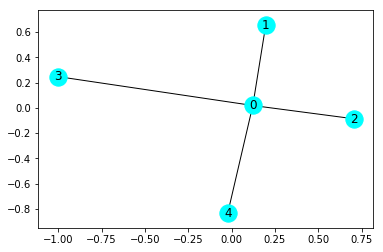

In [33]:
# Extracting the best partition from the entire network and visualizing it 

induced = community.induced_graph(partition, G)
print(induced.nodes())
print(induced.edges())

nx.draw_networkx(induced,node_color='cyan',with_labels=True)

In [34]:
# Finding cliques using the Clique Percolation Method 
print('Clique Percolation Method where K=3')
print(list(k_clique_communities(G,3)))

Clique Percolation Method where K=3
[frozenset({'Oliver ', 'Jew ', 'Toby ', 'Artful ', 'Master ', 'Fagin ', 'Dodger ', 'Crackit ', 'Charles ', 'Bates ', 'Sikes ', 'Charley '}), frozenset({'Oliver ', 'Rose ', 'Harry ', 'Losberne ', 'Maylie '}), frozenset({'Oliver ', 'Noah ', 'Charlotte '})]


In [35]:
# We use the inbuilt function that uses this method
cliques = nx.find_cliques(G)

ctr = 1

print("Clique Percolation Method:")

for clique in cliques:
    print("Clique", ctr)
    
    for member in clique:
        print(member, end="; ")
    
    ctr += 1
    print("\n")

Clique Percolation Method:
Clique 1
Oliver ; Jew ; Sikes ; 

Clique 2
Oliver ; Rose ; Harry ; Maylie ; 

Clique 3
Oliver ; Rose ; Losberne ; 

Clique 4
Oliver ; Toby ; Sikes ; 

Clique 5
Oliver ; Toby ; Crackit ; 

Clique 6
Oliver ; Jack ; 

Clique 7
Oliver ; Noah ; Charlotte ; 

Clique 8
Oliver ; Grimwig ; 

Clique 9
Oliver ; Giles ; 

Clique 10
Oliver ; Fagin ; Master ; Bates ; Dodger ; 

Clique 11
Oliver ; Fagin ; Sikes ; 

Clique 12
Oliver ; Sowerberry ; 

Clique 13
Oliver ; Bedwin ; 

Clique 14
Artful ; Master ; Charles ; Bates ; 

Clique 15
Miss ; Nancy ; 

Clique 16
Miss ; Maylie ; 

Clique 17
Bill ; Sikes ; 

Clique 18
Brittles ; Giles ; 

Clique 19
Bolter ; Fagin ; 

Clique 20
Claypole ; Noah ; 

Clique 21
Charley ; Bates ; Dodger ; 



# ADDITIONAL ANALYSIS

### Find the similarity between nodes. List the top five pairs in terms of structural similarity

In [36]:
# We have used the jaccard_coefficient to find the similarity between nodes

jaccard_coeffs = nx.jaccard_coefficient(G)

jaccard_list = {}

for node1, node2, coeff in jaccard_coeffs:
    print("Node1:", node1, "Node2:", node2, "Coefficient:", coeff)
    key = node1+" and "+node2
    jaccard_list[key] = coeff

Node1: Toby  Node2: Jack  Coefficient: 0.3333333333333333
Node1: Toby  Node2: Harry  Coefficient: 0.2
Node1: Toby  Node2: Noah  Coefficient: 0.2
Node1: Toby  Node2: Master  Coefficient: 0.125
Node1: Toby  Node2: Giles  Coefficient: 0.25
Node1: Toby  Node2: Fagin  Coefficient: 0.2857142857142857
Node1: Toby  Node2: Nancy  Coefficient: 0.0
Node1: Toby  Node2: Sowerberry  Coefficient: 0.3333333333333333
Node1: Toby  Node2: Claypole  Coefficient: 0.0
Node1: Toby  Node2: Charley  Coefficient: 0.0
Node1: Toby  Node2: Bedwin  Coefficient: 0.3333333333333333
Node1: Toby  Node2: Dodger  Coefficient: 0.14285714285714285
Node1: Toby  Node2: Jew  Coefficient: 0.6666666666666666
Node1: Toby  Node2: Rose  Coefficient: 0.16666666666666666
Node1: Toby  Node2: Artful  Coefficient: 0.0
Node1: Toby  Node2: Grimwig  Coefficient: 0.3333333333333333
Node1: Toby  Node2: Losberne  Coefficient: 0.25
Node1: Toby  Node2: Miss  Coefficient: 0.0
Node1: Toby  Node2: Charlotte  Coefficient: 0.25
Node1: Toby  Node2: 

Node1: Brittles  Node2: Nancy  Coefficient: 0.0
Node1: Brittles  Node2: Crackit  Coefficient: 0.0
Node1: Brittles  Node2: Sowerberry  Coefficient: 0.0
Node1: Brittles  Node2: Claypole  Coefficient: 0.0
Node1: Brittles  Node2: Bedwin  Coefficient: 0.0
Node1: Brittles  Node2: Dodger  Coefficient: 0.0
Node1: Brittles  Node2: Jew  Coefficient: 0.0
Node1: Brittles  Node2: Rose  Coefficient: 0.0
Node1: Brittles  Node2: Artful  Coefficient: 0.0
Node1: Brittles  Node2: Grimwig  Coefficient: 0.0
Node1: Brittles  Node2: Losberne  Coefficient: 0.0
Node1: Brittles  Node2: Miss  Coefficient: 0.0
Node1: Brittles  Node2: Bill  Coefficient: 0.0
Node1: Brittles  Node2: Charles  Coefficient: 0.0
Node1: Brittles  Node2: Bolter  Coefficient: 0.0
Node1: Brittles  Node2: Bates  Coefficient: 0.0
Node1: Brittles  Node2: Maylie  Coefficient: 0.0
Node1: Bolter  Node2: Oliver  Coefficient: 0.05263157894736842
Node1: Bolter  Node2: Jack  Coefficient: 0.0
Node1: Bolter  Node2: Noah  Coefficient: 0.0
Node1: Bolter 

Node1: Dodger  Node2: Rose  Coefficient: 0.125
Node1: Dodger  Node2: Artful  Coefficient: 0.3333333333333333
Node1: Dodger  Node2: Grimwig  Coefficient: 0.2
Node1: Dodger  Node2: Losberne  Coefficient: 0.16666666666666666
Node1: Dodger  Node2: Miss  Coefficient: 0.0
Node1: Dodger  Node2: Bill  Coefficient: 0.0
Node1: Dodger  Node2: Charles  Coefficient: 0.3333333333333333
Node1: Jew  Node2: Rose  Coefficient: 0.2
Node1: Jew  Node2: Artful  Coefficient: 0.0
Node1: Jew  Node2: Grimwig  Coefficient: 0.5
Node1: Jew  Node2: Miss  Coefficient: 0.0
Node1: Jew  Node2: Losberne  Coefficient: 0.3333333333333333
Node1: Jew  Node2: Bill  Coefficient: 0.5
Node1: Jew  Node2: Charles  Coefficient: 0.0
Node1: Jew  Node2: Bates  Coefficient: 0.125
Node1: Rose  Node2: Artful  Coefficient: 0.0
Node1: Rose  Node2: Grimwig  Coefficient: 0.25
Node1: Rose  Node2: Miss  Coefficient: 0.2
Node1: Rose  Node2: Bill  Coefficient: 0.0
Node1: Rose  Node2: Charles  Coefficient: 0.0
Node1: Rose  Node2: Bates  Coeffici

In [37]:
# Finding the jaccard_coefficient for the top five similaritites
sorted_list = sorted(jaccard_list.items(), key=itemgetter(1), reverse=True)[0:30]

em = []

for pair in sorted_list:
    print(pair[0], pair[1])
    em.append(pair[0])
    em.append(pair[1])

###  Find the clustering coefficients of each node and the global clustering coefficient

In [38]:
# Extracting clustering coefficients of all nodes in the graph
clustering_coeffs = nx.clustering(G)

print("The Clustering Coefficient of:")
for coeff in clustering_coeffs:
    print(coeff, "is", clustering_coeffs[coeff])

print('\nGlobal clustering coefficient is:', nx.average_clustering(G))

###  Detect sub-structures ( k clique, K components etc)

In [39]:
# Detecting k-cliques

cliques = list(k_clique_communities(G, 4))

ctr = 1

for clique in cliques:
    print("Clique", ctr)
    
    for member in clique:
        print(member, end="; ")
        
    ctr += 1
    print("\n")

In [40]:
# Detecting k-components

components = nx.k_components(G)
ctr = 1

for component in components:
    print("Component", ctr)
    print(components[component], "\n")
    ctr += 1

Component 3
[{'Oliver ', 'Rose ', 'Harry ', 'Losberne ', 'Maylie '}, {'Oliver ', 'Noah ', 'Charlotte '}, {'Oliver ', 'Jew ', 'Toby ', 'Artful ', 'Master ', 'Fagin ', 'Dodger ', 'Crackit ', 'Charles ', 'Bates ', 'Sikes ', 'Charley '}] 

Component 4
[{'Oliver ', 'Jack ', 'Toby ', 'Harry ', 'Noah ', 'Master ', 'Giles ', 'Fagin ', 'Nancy ', 'Crackit ', 'Sowerberry ', 'Claypole ', 'Sikes ', 'Charley ', 'Bedwin ', 'Dodger ', 'Jew ', 'Rose ', 'Artful ', 'Grimwig ', 'Losberne ', 'Miss ', 'Charlotte ', 'Bill ', 'Brittles ', 'Charles ', 'Bolter ', 'Bates ', 'Maylie '}] 



<h3> k. Make some models (random graph, small world and preferential attachment) using some of the parameters above </h3>

Average path length 1.8367816091954023
Average clustering co-efficient 0.29779350279350275


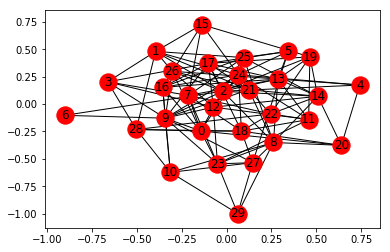

In [41]:
D = nx.erdos_renyi_graph(30, 0.25) # 30--->since no of nodes in this graph=30 and probability for edge creation=0.25
nx.draw_networkx(D)
print('Average path length',nx.average_shortest_path_length(D))
print('Average clustering co-efficient',nx.average_clustering(D))

<h4> Random Graph generation using the gnp_random_graph function </h4>

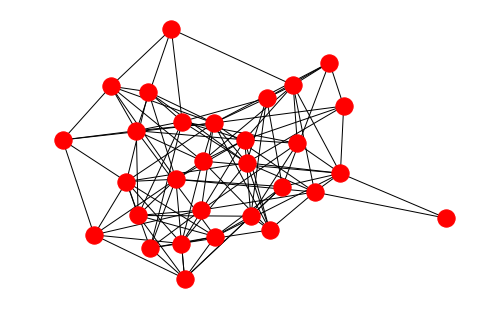

In [42]:
D = nx.gnp_random_graph(30, 0.25, 30)

nx.draw(D)

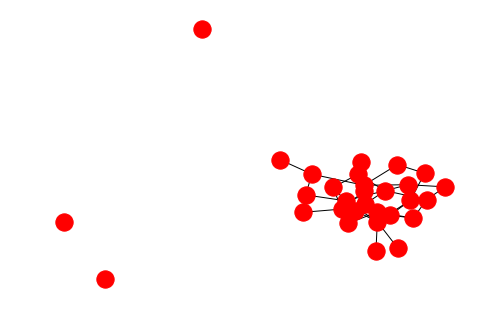

In [43]:
D = nx.gnp_random_graph(30, 0.1, 30)

nx.draw(D)

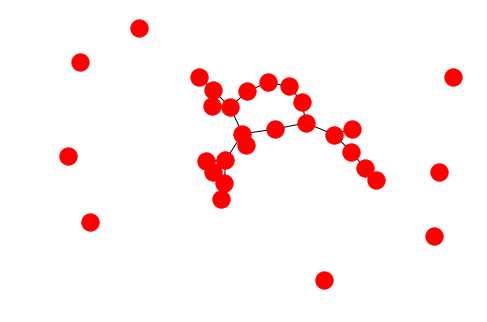

In [44]:
D = nx.gnp_random_graph(30, 0.05, 30)

nx.draw(D)

<h4> Random Graph generation using the random_regular_graph function </h4>

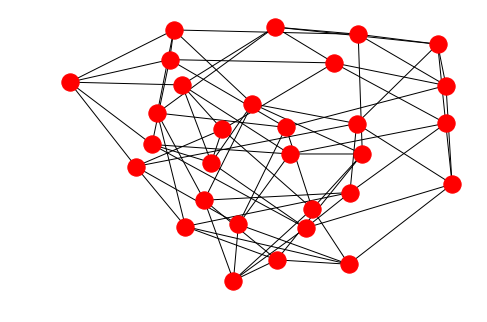

In [45]:
D = nx.random_regular_graph(5, 30)

nx.draw(D)

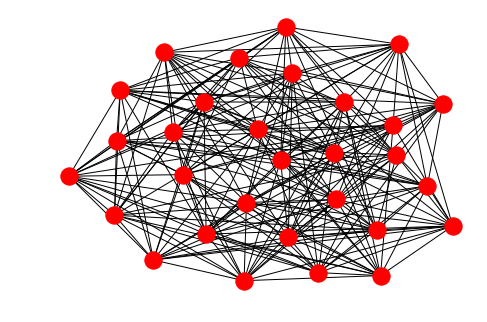

In [46]:
D = nx.random_regular_graph(15, 30)

nx.draw(D)

<h4> Preferential Attachment Model </h4>

Average path length 3.7379310344827585
Average clustering co-efficient 0.0


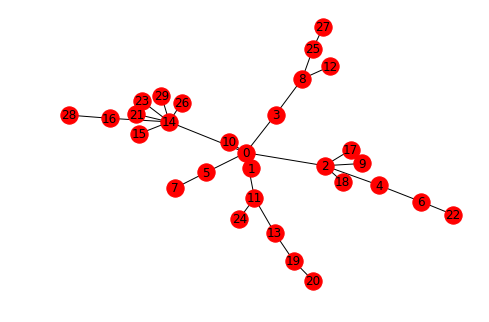

In [47]:
D = nx.barabasi_albert_graph(30,1)  #barabasi_albert_graph(m,n) : m=No of nodes, n=how many existing nodes it can connect to
nx.draw(D,with_labels=True)
print('Average path length',nx.average_shortest_path_length(D))
print('Average clustering co-efficient',nx.average_clustering(D))

<h3> Small World Network Model</h3>

Average path length 2.6758620689655173
Average clustering co-efficient 0.2674603174603175


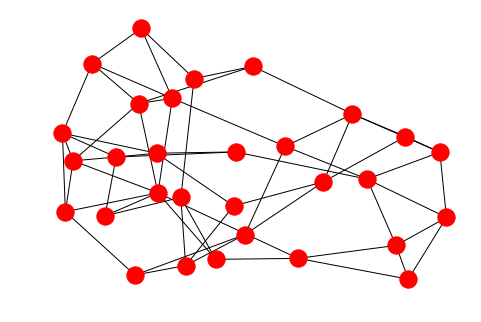

In [48]:
D = nx.watts_strogatz_graph(30,5,0.25)
nx.draw(D)
print('Average path length',nx.average_shortest_path_length(D))
print('Average clustering co-efficient',nx.average_clustering(D))

## f. ANALYSIS

<h3> a. Analyse centrality (contrast degree, closeness, betweenness, Eigenvector) and “centrality correlation” plots. Make comments about characters(any 4 and use your judgement) </h3>

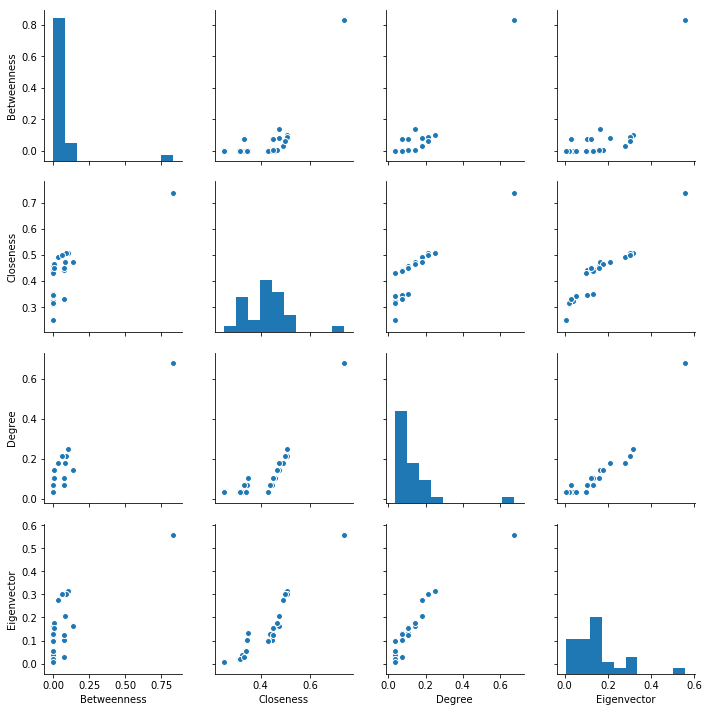

In [49]:
sns.pairplot(centrality_comparison)


1. The analysis of the novel 'Oliver Twist' by Charles Dickens brings out Oliver Twist, the protagonist of the story, has the highest degree centrality by quite a large margin, with a value of 0.5588; followed by Bates, Master, and Fagin. Bates and Master have an equal degree centrality value, they are equally popular throughout the narrative of the plot.
2. Oliver has the highest betweenness centrality value too, of 0.5927, showing his strong influence on the communication between other characters, followed by Maylie, his aunt despite her having just 3 connections; and Master and Bates. 
3. Oliver's high closeness centrality value of 0.6184 proves him to be the best to bring about change within the network; followed by Bates, Master, and Fagin.
4. Oliver, again, is the character who is most well-connected within the network, owing to his (highest) EigenCentrality value. Fagin, the head of the band of criminals in the story of the plot, is among those who are most well-connected, as well.

<h3> b. Make a comment about the community/components detected in the context of the plot </h3> 

The "main members" or the most influential among the band of criminals, Artful; Charles; Bates; Master, form a clique of their own.

Oliver has quite a few cliques he is a part of, giving us an idea of the various narratives in the story.

<h3> c. Do some analysis by comparing with some of the parameters you obtained from the artificial graph models (random, small world or preferential attachment) of comparable size </h3>

We primarily used two graph generators to look at possible graphs and models that we could create.
<ol>
<li>
<b> gnp_random_graph(n, p, seed=None, directed=False) </b> <br />
This function takes two parameters:
<ul>
<li> n - number of nodes in the graph </li>
<li> p - probability of edges between nodes in the graph </li>
</ul>
We also set a seed for all the graphs generated, so we had some level of consistency in the results. <br />
By varying the probability of the presence of an edge, we see that we slowly move from graphs which has only one large component, to graphs which have disconnected and isolated nodes as well. <br />
However, we see that if we reduce the probability, the chances of getting isolated components with more than one node, is 0. Hence, to create realistic social networks, we will have to create many different graphs and merge them together. This will be the only way to create realistic social graphs, like the one we have obtained from the story of "Oliver Twist"
</li>
<li>
<b> random_regular_graph(d, n[, seed]) </b>
This function takes two parameters:
<ul>
<li> d - degree that each node must have </li>
<li> n - number of nodes in the graph </li>
</ul>
In graph theory, a regular graph is a graph where each vertex has the same number of neighbors; i.e. every vertex has the same degree or valency. <br />


A general observation could be that creating realistic social graphs that represent a particular situation, story, excerpt from reality etc. cannot be done using these basic algorithms, we would require large amounts of data to create these. Random generation of many graphs and mergeing these graphs could give us a semi-realistic model. 

<li>
<b> erdos_renyi_graph(n,p) </b>
This function takes two parameters:
<ul>
<li> n - No of nodes </li>
<li> p - probablilty of edge creation  </li>
</ul>

<li>
<b> barabasi_albert_graph(m,n) </b>
This function takes two parameters:
<ul>
<li> m - No of nodes </li>
<li> n - how many existing nodes it can connect to  </li>
</ul>
In graph theory, the preferential attachment is realized by connecting to node vi based on its degree probability n <br />
    
<li>
<b> watts_strogatz_graph(n,k,p) </b>
This function takes three parameters:
<ul>
<li> n - number of nodes in the graph </li>
<li> k - each node connected to k nearest neighbours[in the inital ring lattice] </li>
<li> p - rewiring probability </li>
</ul>
In graph theory, a small world network conserves local structure but has some randomness. Here some edges are rewired with probability p <br />

</ol>

<h4> <i>Average Path Length </i></h4>

Preferential Model has the highest value of avearge path length followed by small world network and random network models.This is because when a new user joins the network, the probability of connecting to existing nodes is proportional to the nodes’ degree which is constantly increasing. Here, random network model's value is least.

<h4><i>Average Clustering Coefficient</i></h4>

Small world model has high average clustering coefficient followed by random and preferential network. This is because of the high probablity of a third edge formation and also of the small diameter.Here, preferential network model's value is least.

<h3> d. Any interesting observations? </h3> 

The fictional address in Oliver Twist, Saffron Hill, is separated from the network. This could be because it features only early on in the story, being the location where the Artful Dodger takes Oliver after he escapes his first home, the badly-run home for orphans.

Jem Spyers is also disconnected from the graph, and this might possibly be because Jem Spyers wasn't a character actually introduced to us in the novel, but is mentioned by Mr. Losberne to the officers when he tells the officers a story of another burglary in the scene that his friend Jem Spyers investigated. The officers have arrived to look into an attempted burglary, that would possibly indict Oliver. This a crucial point to the story, and Mr. Losberne takes them to Oliver and proves to them that Oliver wasn't involved. The officers leave and Oliver is in the good care of Rose, Mrs. Maylie, and Losberne. 